# Load Libaries

In [0]:
# plotting utilities
import seaborn as sns
import matplotlib.pyplot as plt

# tensorflow
import tensorflow as tf
import tensorflow.keras as K

# data-science & processing tools
import numpy as np
import pandas as pd

import sklearn as sk
from sklearn.cluster import KMeans

import functools
import os
import platform
import random
import shutil
import sys
import datetime

# Load Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

my_data_dir = '/content/drive/My Drive/6874_FinalProject/latent_representation/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
X = np.loadtxt(my_data_dir + 'bw_smalllatent_train.txt')
X_test = np.loadtxt(my_data_dir + 'bw_smalllatent_test.txt')
class_label = np.loadtxt(my_data_dir + 'bw_smally_train.txt')
class_label_test = np.loadtxt(my_data_dir + 'bw_smally_test.txt')

X = np.append(X, X_test, axis=0)
class_label = np.append(class_label, class_label_test, axis=0)

print(str(X.shape) + 'gene expression matrix shape')
print(str(class_label.shape) + 'class labels shape')

(18287, 676)gene expression matrix shape
(18287,)class labels shape


# Clustering Autoencoder 2

In [0]:
Sum_of_squared_distances = []
K = range(1,31)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(X)
    print("iteration {} done".format(k))
    Sum_of_squared_distances.append(km.inertia_)

iteration 1 done
iteration 2 done
iteration 3 done
iteration 4 done
iteration 5 done
iteration 6 done
iteration 7 done
iteration 8 done
iteration 9 done
iteration 10 done
iteration 11 done
iteration 12 done
iteration 13 done
iteration 14 done
iteration 15 done
iteration 16 done
iteration 17 done
iteration 18 done
iteration 19 done
iteration 20 done
iteration 21 done
iteration 22 done
iteration 23 done
iteration 24 done
iteration 25 done
iteration 26 done
iteration 27 done
iteration 28 done
iteration 29 done
iteration 30 done


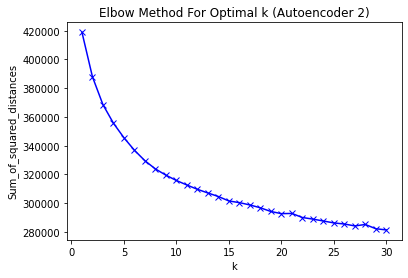

In [0]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k (Autoencoder 2)')
plt.show()

In [0]:
km = KMeans(n_clusters=15)
km = km.fit(X)

In [0]:
test_crosstab = pd.crosstab(km.labels_, class_label, normalize='columns')

In [0]:
test_crosstab.columns = test_crosstab.columns.rename('Cell Types')
test_crosstab.index = test_crosstab.index.rename('Clusters')

In [0]:
x_ticks = ['BAS', 'EBO',	'EOS',	'KSC',	'LYA',	'LYT',	'MMZ',	'MOB',	'MON',	'MYB',	'MYO',	'NGB',	'NGS',	'PMB',	'PMO']

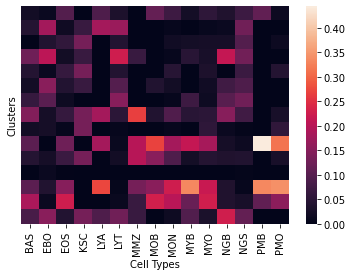

In [0]:
sns.heatmap(test_crosstab, annot=False, xticklabels=x_ticks, yticklabels=False)

## Load Autoencoder 2 to Create Cluster Representatives

In [0]:
# import Keras
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model
from keras import optimizers
from keras import backend as K
from keras.models import model_from_json
json_file = open("/content/drive/My Drive/6874_FinalProject/autoencoder_small.json", 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("/content/drive/My Drive/6874_FinalProject/autoencoder_small.h5")
print("Loaded model from disk")

Using TensorFlow backend.


Loaded model from disk


In [0]:
encoded_input = Input(shape=(13, 13, 4))
decode = loaded_model.layers[-9](encoded_input)
decode = loaded_model.layers[-8](decode)
decode = loaded_model.layers[-7](decode)
decode = loaded_model.layers[-6](decode)
decode = loaded_model.layers[-5](decode)
decode = loaded_model.layers[-4](decode)
decode = loaded_model.layers[-3](decode)
decode = loaded_model.layers[-2](decode)
decode = loaded_model.layers[-1](decode)

autodecoder = Model(encoded_input, decode)

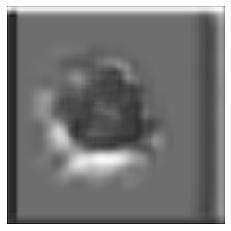

In [0]:
X_sub = tf.math.reduce_min(X[km.labels_ ==12,:], axis=0)
X_resh = tf.reshape(X_sub, (1,13,13,4))
X_encod = autodecoder.predict(X_resh, steps=1)
X_encod = tf.squeeze(X_encod)
plt.imshow(X_encod)
plt.gray()
plt.axis('off')
plt.show()

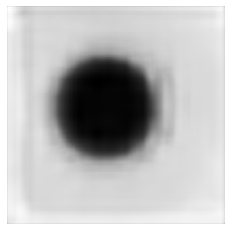

In [0]:
X_sub = tf.math.reduce_mean(X[km.labels_ ==12,:], axis=0)
X_resh = tf.reshape(X_sub, (1,13,13,4))
X_encod = autodecoder.predict(X_resh, steps=1)
X_encod = tf.squeeze(X_encod)
plt.imshow(X_encod)
plt.gray()
plt.axis('off')
plt.show()

# Splitting Into Binary Cell Categories
## Typical vs Atypical Cell Types

In [0]:
typical_atypical_label = class_label

In [0]:
typical_atypical_label[np.isin(typical_atypical_label, [1,4,6,7,9,10,13,14])] = 1

In [0]:
typical_atypical_label[typical_atypical_label != 1] = 0

In [0]:
km2 = KMeans(n_clusters=2)
km2 = km2.fit(X)

In [0]:
typ_atyp_cross = pd.crosstab(km2.labels_, typical_atypical_label, normalize='columns')
typ_atyp_cross.columns = typ_atyp_cross.columns.rename('Cell Types')
typ_atyp_cross.index = typ_atyp_cross.index.rename('Clusters')

In [0]:
x_ticks2 = ['typical', 'atypical']

In [0]:
typ_atyp_cross

Cell Types,0.0,1.0
Clusters,,
0,0.451995,0.651927
1,0.548005,0.348073
